<a href="https://colab.research.google.com/github/kellykhy/DL2022-1/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2
Answer following questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5223 - accuracy: 0.7820 - val_loss: 0.3872 - val_accuracy: 0.8722
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3125 - accuracy: 0.9017 - val_loss: 0.3093 - val_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2233 - accuracy: 0.9275 - val_loss: 0.2796 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1723 - accuracy: 0.9445 - val_loss: 0.2788 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1442 - accuracy: 0.9520 - val_loss: 0.2923 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1168 - accuracy: 0.9646 - val_loss: 0.3027 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0983 - accuracy: 0.9709 - val_loss: 0.3096 - val_accuracy: 0.8845
Epoch 8/20
30

### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [ ]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [ ]:
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history2 = model2.fit(partial_x_train,
           partial_y_train,
           epochs=20,
           batch_size=512,
           validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5199 - accuracy: 0.7755 - val_loss: 0.3758 - val_accuracy: 0.8758
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3022 - accuracy: 0.9011 - val_loss: 0.2996 - val_accuracy: 0.8885
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2167 - accuracy: 0.9305 - val_loss: 0.2817 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1721 - accuracy: 0.9429 - val_loss: 0.2770 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1358 - accuracy: 0.9567 - val_loss: 0.3371 - val_accuracy: 0.8710
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1119 - accuracy: 0.9637 - val_loss: 0.3145 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0936 - accuracy: 0.9710 - val_loss: 0.3182 - val_accuracy: 0.8845
Epoch 8/20
30

### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

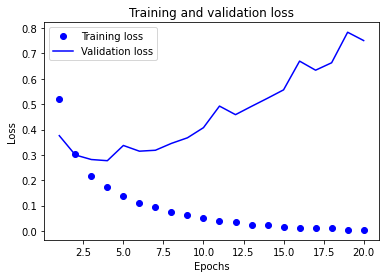

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

In [ ]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])

## retrain and visualize the validation loss of new model
model2_dr.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history2_dr = model2_dr.fit(partial_x_train,
               partial_y_train,
               epochs=20,
               batch_size=512,
               validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.6251 - accuracy: 0.6407 - val_loss: 0.5056 - val_accuracy: 0.8468
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4933 - accuracy: 0.7874 - val_loss: 0.4191 - val_accuracy: 0.8504
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4097 - accuracy: 0.8437 - val_loss: 0.3392 - val_accuracy: 0.8817
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3434 - accuracy: 0.8832 - val_loss: 0.3034 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2900 - accuracy: 0.9001 - val_loss: 0.2894 - val_accuracy: 0.8915
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2589 - accuracy: 0.9144 - val_loss: 0.2818 - val_accuracy: 0.8931
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2168 - accuracy: 0.9300 - val_loss: 0.2919 - val_accuracy: 0.8926
Epoch 8/20
30

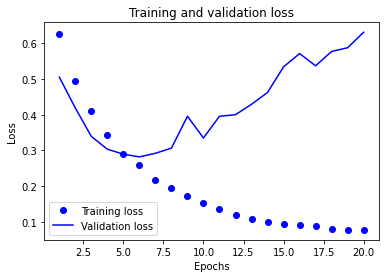

In [ ]:
import matplotlib.pyplot as plt
history2_dr_dict = history2_dr.history
loss_values = history2_dr_dict["loss"]
val_loss_values = history2_dr_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [ ]:
## Add l1 regularization on the second dense layers 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model2_l1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, kernel_regularizer = regularizers.l1(0.001), activation="relu"),    ### add l1 regularization here
    layers.Dense(2, activation="softmax")
])

### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

In [ ]:
model2_l1.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history2_l1 = model2_l1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5385 - accuracy: 0.7952 - val_loss: 0.4247 - val_accuracy: 0.8614
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3344 - accuracy: 0.9058 - val_loss: 0.3435 - val_accuracy: 0.8888
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2599 - accuracy: 0.9310 - val_loss: 0.3254 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2191 - accuracy: 0.9420 - val_loss: 0.3349 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1810 - accuracy: 0.9579 - val_loss: 0.3384 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1566 - accuracy: 0.9657 - val_loss: 0.3489 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1395 - accuracy: 0.9725 - val_loss: 0.3751 - val_accuracy: 0.8791
Epoch 8/20
30

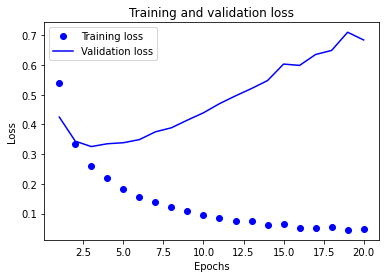

In [ ]:
import matplotlib.pyplot as plt
history2_l1_dict = history2_l1.history
loss_values = history2_l1_dict["loss"]
val_loss_values = history2_l1_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()